In [1]:
import tensorflow as tf

In [40]:
!pip install seaborn

Looking in indexes: https://pypi.doubanio.com/simple/


In [2]:
tf.__version__

'1.15.0'

## 准备数据集
y = w * x + b ===><br/>
y = 2 * x + 1

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(5)

In [5]:
x_data = np.linspace(-1, 1, num=100)
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

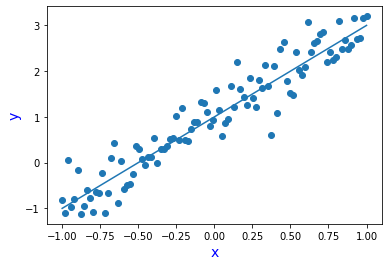

In [6]:
plt.scatter(x_data, y_data)
plt.xlabel('x', fontdict={'size':14, 'color':'blue'})
plt.ylabel('y', fontdict={'size':14, 'color':'blue'})
plt.plot(x_data, 2 * x_data + 1);

d:\programdata\anaconda3\envs\tf1.15\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


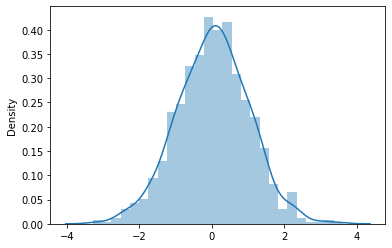

In [7]:
y = np.random.randn(1000) ## 正太分布
sns.distplot(y);

In [8]:
x_data.shape, y_data.shape

((100,), (100,))

In [9]:
x = tf.placeholder("float", name='x')
y = tf.placeholder("float", name='y')

In [10]:
# 前向计算
def model(x, w, b):
    return tf.multiply(x, w) + b

In [11]:
train_epochs = 10
learning_rate = 0.05
# 多少个参数就有多少个变量
w = tf.Variable(1.0, name='w0')
b = tf.Variable(0.0, name='b0')

In [12]:
pred = model(x, w, b)
loss = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
opt_op = optimizer.minimize(loss)

Loss: 0.10655691
Loss: 0.052370854
Loss: 0.04867115
Loss: 0.048365295
Loss: 0.0483395
Loss: 0.048337404
Loss: 0.048337195
Loss: 0.048337195
Loss: 0.048337195
Loss: 0.048337195


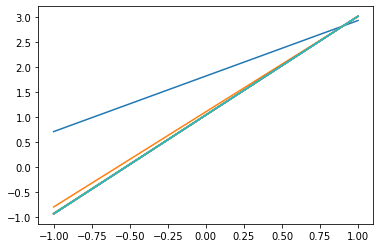

In [13]:
import time 
loss_list = []
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        opt_op_, loss_ = sess.run([opt_op, loss], feed_dict= {x: xs, y:ys})
        loss_list.append(loss_)
    
    print('Loss:', loss_)
    
    b0tmp = b.eval(session=sess)
    w0tmp = w.eval(session=sess)

    plt.plot(x_data, w0tmp * x_data + b0tmp)
    #plt.show()
    #time.sleep(1)
        

In [14]:
type(pred), type(w), type(b), type(loss), type(optimizer), type(opt_op)

(tensorflow.python.framework.ops.Tensor,
 tensorflow.python.ops.variables.RefVariable,
 tensorflow.python.ops.variables.RefVariable,
 tensorflow.python.framework.ops.Tensor,
 tensorflow.python.training.gradient_descent.GradientDescentOptimizer,
 tensorflow.python.framework.ops.Operation)

In [15]:
sess.run([w, b])

[1.9822965, 1.0420128]

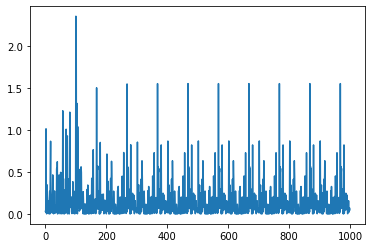

In [19]:
plt.plot(loss_list);

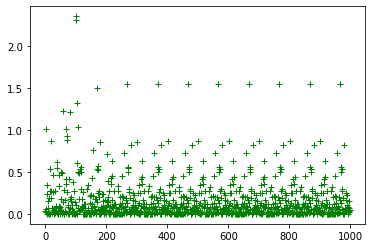

In [20]:
plt.plot(loss_list, 'g+')

In [17]:
loss_list

[0.03114908,
 0.02163479,
 1.0133754,
 0.05646502,
 0.0006992451,
 0.34727776,
 0.24122864,
 0.065101445,
 0.014968204,
 0.0070219035,
 0.15478097,
 0.00757534,
 0.0010583644,
 0.1878598,
 0.26940653,
 0.0011296432,
 0.53722084,
 0.8656588,
 0.27769414,
 0.1866079,
 0.064903125,
 0.021904891,
 0.012487465,
 0.011037399,
 0.46467254,
 0.2550872,
 0.04187509,
 0.001192657,
 0.040400144,
 0.024833022,
 0.27354527,
 0.0068125203,
 0.04067147,
 0.02749996,
 0.036793835,
 0.10010535,
 0.08215879,
 0.5418256,
 0.01318952,
 0.62079954,
 0.00023227165,
 0.0031669876,
 0.042857893,
 0.09853552,
 0.075023614,
 0.46436095,
 0.3342394,
 0.08329163,
 0.0021233934,
 0.0063010766,
 0.49506107,
 0.033462007,
 0.17779666,
 0.010883717,
 0.000502974,
 0.48764813,
 0.02259508,
 1.2284044,
 0.14411294,
 0.023637433,
 0.0036639755,
 0.2860575,
 0.00035949965,
 0.03639953,
 0.17003532,
 0.029215649,
 0.41998976,
 0.009206107,
 1.0088208,
 0.3544198,
 0.26534435,
 0.8787706,
 0.92894757,
 0.00078087207,
 0.08